<a href="https://colab.research.google.com/github/20130236/ML/blob/main/Lab_4_20130236_Le_Dinh_Quoc_Dung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab is to continous dealing with **Logistic Regression**, **kNN**, and **Decision Tree** alogirthms applied to classification tasks. 

*   **Deadline: 23:59, 12/03/2023**



# Import libraries

In [22]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score  
from sklearn.metrics import f1_score 
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics._plot.precision_recall_curve import precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Ml'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Ml


#Task 1. 
Apply **LogisticRegression** to iris dataset which aims at classifying species of iris based on sepal_length (chiều dài đài hoa), sepal_width, petal_length (chiều dài cánh hoa), petal_width. The species are '**setosa**' '**versicolor**' and '**virginica**'. 



```
from sklearn import datasets
data4 = datasets.load_iris()
```




[[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]
Accuracy :  0.9777777777777777


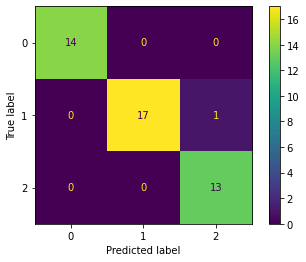

In [5]:
data = datasets.load_iris()
classifier = LogisticRegression(random_state = 0)
x = data['data']
y = data['target']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)
classifier.fit(x_train, y_train) 
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred) 
print(cm)
print ("Accuracy : ", accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred) 

#Task 2. 
Apply LogisticRegression to **MNIST** dataset (mnist.csv) which aims at classifying handwritten digits. Dataset includes 784 pixels values of images (28x28). 


```
from sklearn import datasets
# load the MNIST digits dataset
mnist = datasets.load_digits()
```



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[59  0  0  0  0  0  0  0  0  0]
 [ 0 48  0  0  1  0  0  0  0  0]
 [ 0  0 49  0  0  0  0  0  0  0]
 [ 0  0  1 61  0  0  0  1  1  0]
 [ 0  1  0  0 60  0  0  0  0  0]
 [ 0  1  1  1  0 43  0  0  0  1]
 [ 0  0  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 54  0  1]
 [ 0  0  1  0  0  1  0  0 44  0]
 [ 0  1  0  0  0  1  0  0  1 54]]
Accuracy :  0.9685185185185186


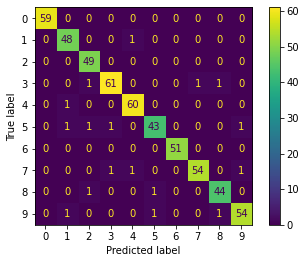

In [6]:
mnist = datasets.load_digits()
x = mnist['data']
y = mnist['target']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)
classifier.fit(x_train, y_train) 
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred) 
print(cm)
print ("Accuracy : ", accuracy_score(y_test, y_pred)) 
ConfusionMatrixDisplay.from_predictions(y_test, y_pred) 

#Task 3. 
Apply another classification algorithm named kNN, which is an instance classifcation model. 
*  3.1. Perform kNN algorithm to Iris dataset with k={1, 3, 5, …, 29}. Select the best value of k.

*   3.2. Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).


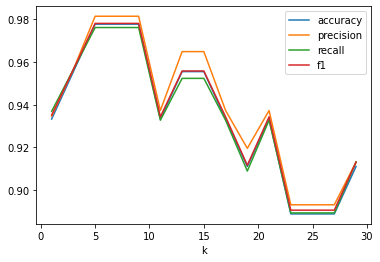

In [7]:
data = datasets.load_iris()
x = data['data']
y = data['target']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=11)
k_arr = range(1,30,2)
accuracy = []
precision = []
recall = []
f1 = []
for k in k_arr :
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test) 
  accuracy.append(accuracy_score(y_test, y_pred))
  precision.append(precision_score(y_test, y_pred, average = 'macro'))
  recall.append(recall_score(y_test, y_pred, average = 'macro'))
  f1.append(f1_score(y_test, y_pred, average = 'macro'))

plt.plot(k_arr,accuracy,label = 'accuracy' )
plt.plot(k_arr,precision,label = 'precision' )
plt.plot(k_arr,recall,label = 'recall' )
plt.plot(k_arr,f1,label = 'f1' )
plt.xlabel('k')
plt.legend()


#Task 4. 
Similar to Task 3, apply kNN algorithm to **mnist** dataset which included in datasets of sklearn API.
*  4.1.	Perform kNN algorithm to Iris dataset with k={1, 3, 5, …, 29}. Select the best value of k.
*  4.2.	Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).


ValueError: ignored

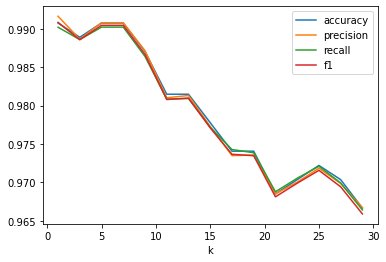

In [26]:
mnist = datasets.load_digits()
x = mnist['data']
y = mnist['target']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)

k_arr = range(1,30,2)
accuracy = []
precision = []
recall = []
f1 = []
for k in k_arr :
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test) 
  accuracy.append(accuracy_score(y_test, y_pred))
  precision.append(precision_score(y_test, y_pred, average = 'macro'))
  recall.append(recall_score(y_test, y_pred, average = 'macro'))
  f1.append(f1_score(y_test, y_pred, average = 'macro'))

plt.plot(k_arr,accuracy,label = 'accuracy' )
plt.plot(k_arr,precision,label = 'precision' )
plt.plot(k_arr,recall,label = 'recall' )
plt.plot(k_arr,f1,label = 'f1' )
plt.xlabel('k')
plt.legend()


In [25]:
mnist = datasets.load_digits()
xKNN = mnist['data']
yKNN = mnist['target']
x_trainKNN, x_testKNN, y_trainKNN, y_testKNN = train_test_split(xKNN,yKNN,test_size=0.3, random_state=1)

k_arr = range(1,30,2)
accuracyKNN = []
precisionKNN = []
recallKNN = []
f1KNN = []
for k in k_arr :
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(x_trainKNN,y_trainKNN)
  y_predKNN = model.predict(x_testKNN) 
  accuracyKNN.append(accuracy_score(y_testKNN, y_predKNN))
  precisionKNN.append(precision_score(y_testKNN, y_predKNN, average = 'macro'))
  recallKNN.append(recall_score(y_testKNN, y_predKNN, average = 'macro'))
  f1KNN.append(f1_score(y_testKNN, y_predKNN, average = 'macro'))

data = datasets.load_iris()
x = data['data']
y = data['target']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=11)
k_arr = range(1,30,2)
accuracy = []
precision = []
recall = []
f1 = []
for k in k_arr :
  model = LogisticRegression(random_state=0)
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test) 
  accuracy.append(accuracy_score(y_test, y_pred))
  precision.append(precision_score(y_test, y_pred, average = 'macro'))
  recall.append(recall_score(y_test, y_pred, average = 'macro'))
  f1.append(f1_score(y_test, y_pred, average = 'macro'))

KNN = {"Accuracy" : accuracyKNN, 'Precision:' :precisionKNN, 'Recall:' : recallKNN, 'F1 score:' :f1KNN}
LR = {'Accuracy:' : accuracy, 'Precision:' : precision, 'Recall:' :recall, 'F1 score:' : f1}
knn2 = pd.Series(KNN)
lr2 = pd.Series(LR)

df = pd.DataFrame({'KNN': knn2,'LR': lr2})
df


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

,KNN,LR
Accuracy,"[0.9907407407407407, 0.9888888888888889, 0.990...",NaN
Accuracy:,NaN,"[0.9333333333333333, 0.9333333333333333, 0.933..."
F1 score:,"[0.9908173034960391, 0.9885720387981097, 0.990...","[0.9343915343915343, 0.9343915343915343, 0.934..."
Precision:,"[0.9916224067339142, 0.98862886227202, 0.99078...","[0.9373219373219372, 0.9373219373219372, 0.937..."
Recall:,"[0.9901950925947087, 0.9885863391256985, 0.990...","[0.9327731092436974, 0.9327731092436974, 0.932..."


#Task 5. 
Compare the performance of selected classification algorithms (**Decision Treen, kNN, and Logistic Regression**) to ***spam detection***. The dataset can be accessed from the link: http://archive.ics.uci.edu/ml/datasets/Spambase 
Attribute Information:
The last column of 'spambase.csv denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes: 
*  48 continuous real [0,100] attributes of type word_freq_WORD 
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. **Example**: word_freq_address: percentage of words in the e-mail that match ADDRESS.
*  6 continuous real [0,100] attributes of type char_freq_CHAR] 
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail
*  1 continuous real [1,...] attribute of type capital_run_length_average 
= average length of uninterrupted sequences of capital letters
*  1 continuous integer [1,...] attribute of type capital_run_length_longest 
= length of longest uninterrupted sequence of capital letters
*  1 continuous integer [1,...] attribute of type capital_run_length_total = sum of length of uninterrupted sequences of capital letters = total number of capital letters in the e-mail
*  1 nominal {0,1} class attribute of type spam = denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. 


---


In order to compare the performance of selected algorithms, some common metrics including **accuracy, precision, recall, f1 measures** could be used.


In [89]:

data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data', header=None)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Decision Tree algorithm
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
pred_labels_dtc = dtc.predict(X_test)
accuracy_dtc = accuracy_score(y_test, pred_labels_dtc)
precision_dtc = precision_score(y_test, pred_labels_dtc)
recall_dtc = recall_score(y_test, pred_labels_dtc)
f1_dtc = f1_score(y_test, pred_labels_dtc)

# kNN algorithm
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
pred_labels_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, pred_labels_knn)
precision_knn = precision_score(y_test, pred_labels_knn)
recall_knn = recall_score(y_test, pred_labels_knn)
f1_knn = f1_score(y_test, pred_labels_knn)

# Logistic Regression algorithm
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
pred_labels_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, pred_labels_lr)
precision_lr = precision_score(y_test, pred_labels_lr)
recall_lr = recall_score(y_test, pred_labels_lr)
f1_lr = f1_score(y_test, pred_labels_lr)

KNN = {'Accuracy' : accuracy_knn, 'Precision:' :precision_knn, 'Recall:' : recall_knn, 'F1 score:' :f1_knn}
LR = {'Accuracy:' : accuracy_lr, 'Precision:' : precision_lr, 'Recall:' : recall_lr, 'F1 score:' : f1_lr}
DCT = {'Accuracy:' : accuracy_dtc, 'Precision:' : precision_dtc, 'Recall:' : recall_dtc, 'F1 score:' : f1_dtc}
knn2 = pd.Series(KNN)
lr2 = pd.Series(LR)
dct2 = pd.Series(DCT)

df = pd.DataFrame({'KNN': knn2,'LR': lr2,'DTC': dct2})
df

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,KNN,LR,DTC
Accuracy,0.782042,NaN,NaN
Accuracy:,NaN,0.920348,0.899348
F1 score:,0.728584,0.902655,0.879445
Precision:,0.759398,0.922242,0.880208
Recall:,0.700173,0.883882,0.878683


In [71]:
data = pd.read_csv('spambase.csv', header=None)
X = data.iloc[:, : -1].values
y = data.iloc[1 :,-1].values.astype(int)
y

array([1, 1, 1, ..., 0, 0, 0])

In [78]:
data = pd.read_csv('spambase.csv', header=None)
X = data.iloc[:, : -1].values
y = data.iloc[:,-1].values
y

array(['class', '1', '1', ..., '0', '0', '0'], dtype=object)

#Finally,
Save a copy in your Github. Remember renaming the notebook.